# Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import datetime as dt 
from datetime import datetime
import copy as cp
import calendar

In [2]:
# 載入所需函示庫
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels
import statsmodels.stats.libqsturng
from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 150

# Functions 

In [3]:
def add_transportCnt( date, comeIn) -> None : 
    # Given two list, one is the date, the other is the people into every train station
    # The data type of date should be list of datetime.datetime
    # The data type of come into station people should be list of int 

    # transportCnt is global variable 
    global transportCnt 

    # Traverse every data, add comeIn value to that day 
    for i in range( len( date ) ) :
        currentDate = date[i]
        try : 
            transportCnt[currentDate] += comeIn[i]
        except : 
            transportCnt[currentDate] = comeIn[i]

In [4]:
def convert_date(datesList):
    # Given a list of date, with format : yyyymmdd
    # Convert the list into date with type of datetime.datetime

    tempDatesList = cp.deepcopy( datesList )

    for i in range( len( tempDatesList ) ) : 
        currentDateStr = str( tempDatesList[i] )
        year = int( currentDateStr[:4] )
        month = int( currentDateStr[4:6] )
        day = int( currentDateStr[6:8] )
        tempDatesList[i] = dt.datetime( year, month, day )
    return tempDatesList 

# Main dictionary

In [5]:
transportCnt = dict()

# Read data

In [6]:
df_2005_to_2007 = pd.read_csv( '2005-20190422/2005-2017.csv')
df_2018 = pd.read_csv( '2005-20190422/2018.csv')
df_2019_1 = pd.read_csv( '2005-20190422/20190422.csv')
df_2019_2 = pd.read_csv( '20190423-20211231/20190423-20191231.csv')
df_2020 = pd.read_csv( '20190423-20211231/2020.csv')
df_2021 = pd.read_csv( '20190423-20211231/2021.csv' )
df_2022 = pd.read_csv( '2022.csv' ) 

In [7]:
date_2005_to_2017 = df_2005_to_2007['BOARD_DATE']
comeIn_2005_to_2017 = df_2005_to_2007['進站']

date_2018 = df_2018['BOARD_DATE']
comeIn_2018 = df_2018['進站']

date_2019_1 = df_2019_1['BOARD_DATE']
comeIn_2019_1 = df_2019_1['進站']

date_2019_2 = df_2019_2['trnOpDate']
comeIn_2019_2 = df_2019_2['gateInComingCnt']

date_2020 = df_2020['trnOpDate']
comeIn_2020 = df_2020['gateInComingCnt']

date_2021 = df_2021['trnOpDate']
comeIn_2021 = df_2021['gateInComingCnt']

date_2022 = df_2022['trnOpDate']
comeIn_2022 = df_2022['gateInComingCnt']

In [8]:
datesList = list( date_2005_to_2017 ) 
datesList += list( date_2018 ) 
datesList += list( date_2019_1 ) 
datesList += list( date_2019_2 ) 
datesList += list( date_2020 ) 
datesList += list( date_2021 ) 
datesList += list( date_2022 ) 

In [9]:
comeInsList = list( comeIn_2005_to_2017 )
comeInsList += list( comeIn_2018 ) 
comeInsList += list( comeIn_2019_1 ) 
comeInsList += list( comeIn_2019_2 ) 
comeInsList += list( comeIn_2020 ) 
comeInsList += list( comeIn_2021 ) 
comeInsList += list( comeIn_2022 ) 

# Write into main dictionary 

In [10]:
datesList = convert_date( datesList ) 

In [11]:
add_transportCnt( datesList, comeInsList )

In [12]:
len( transportCnt )

6330

In [13]:
transportCnt[dt.datetime( 2007, 12,30 )]

491635

## Functions

In [14]:
def getHoliday(year, Holiday, df):
    name = []
    y = year
    i = year - 2005
    if(type(df[Holiday][i]) == datetime):
        name.append(df[Holiday][i])
    else:
        start, end = df[Holiday][i].split('-')
        start = start.split('/')
        start = [int(s) for s in start]
        end = end.split('/')
        end = [int(s) for s in end]

        if(start[0] == end[0]):
            name += [datetime(y, start[0], x) for x in np.arange(start[1], end[1] + 1, 1)]
        else:
            lastday = calendar.monthrange(y, start[0])[1]
            if(start[0] == 12):
                name += [datetime(y - 1, start[0], x) for x in np.arange(start[1], lastday + 1, 1)]
                name += [datetime(y, end[0], x) for x in np.arange(1, end[1] + 1, 1)]
            else:
                name += [datetime(y, start[0], x) for x in np.arange(start[1], lastday + 1, 1)]
    return name

In [15]:
def getHolidayLength(date):
    holiday, column, i = isHoliday([date.year], h_columns, date)
    if(holiday):
        return df[column][i]
    elif(date.isoweekday() == 6 or date.isoweekday() == 7):
        return 2
    else:
        return 0

In [16]:
def isHoliday(years, columns, date):
    for column in columns:
        for year in years:
            if(date in holiday_rec[column][year - 2005]):
                return True, column, year - 2005
    return False, -1, -1

## Global

In [17]:
df = pd.read_excel('../歷年連假天數.xlsx')
columns = ['春節.1', '端午.1', '中秋.1', '雙十.1', '二二八.1', '元旦.1', '清明.1', '勞動.1']
years = np.arange(2005, 2023, 1)
holiday_rec = []
for column in columns:
    tmp = []
    for year in years:
        tmp.append(getHoliday(year, column, df))
    holiday_rec.append(tmp)
holiday_rec = pd.DataFrame(holiday_rec).T
h_columns = ['春節', '端午', '中秋', '雙十', '二二八', '元旦', '清明', '勞動']
holiday_rec.columns = h_columns

## 日子

### Parametric - One Way Anova

$$H_0: \mu_{平日} = \mu_{一般假日} = \mu_{傳統} = \mu_{國定} = \mu_{西洋} = \mu_{X親}$$  
$$H_1: \text{one of the equality in } H_0 \text{ is not satisfied}$$

In [18]:
traditional = ['春節', '端午', '中秋']
national = ['雙十', '二二八', '元旦', '清明', '勞動']

In [19]:
days = [[], [], [], [], [], []]

In [20]:
year = np.arange(2005, 2023, 1)
month = np.arange(1, 13, 1)
for y in year:
    if(y == 2022):
        month = np.arange(1, 4, 1)
    for m in month:
        for d in np.arange(1, calendar.monthrange(y,m)[1] + 1, 1):
            today = datetime(y,m,d)
            if(isHoliday(year, traditional, today)[0]):
                days[2].append(transportCnt[today])
            elif(isHoliday(year, national, today)[0]):
                days[3].append(transportCnt[today])
            elif((m == 12 and d == 25) or (m == 2 and d == 14) or (m == 10 and d == 31)):
                days[4].append(transportCnt[today])
            elif((m == 8 and d == 8) or (m == 5 and d <= 14 and d >= 8 and today.isoweekday() == 7)):
                days[5].append(transportCnt[today])
            elif(today.isoweekday() == 6 or today.isoweekday() == 7):
                days[1].append(transportCnt[today])
            else:
                days[0].append(transportCnt[today])

In [21]:
df1 = pd.DataFrame(days).T
df1.columns = ['Weekday', 'Weekend', 'Traditional', 'National', 'Western', 'Fother']
df1

,Weekday,Weekend,Traditional,National,Western,Fother
0,298141.0,382902.0,274651.0,478008.0,450405.0,572527.0
1,252051.0,412908.0,477359.0,489242.0,302174.0,410047.0
2,263399.0,408412.0,521655.0,518795.0,569418.0,588807.0
3,280465.0,452831.0,593039.0,504462.0,452942.0,388725.0
4,403391.0,304253.0,582214.0,527932.0,380845.0,592293.0
...,...,...,...,...,...,...
4224,654697.0,NaN,NaN,NaN,NaN,NaN
4225,487321.0,NaN,NaN,NaN,NaN,NaN
4226,480399.0,NaN,NaN,NaN,NaN,NaN
4227,488678.0,NaN,NaN,NaN,NaN,NaN


In [22]:
# wide_to_long假設同樣資料在不同因素下的名稱有相同的字頭，因此我們要改欄位名稱。
df1b = df1.rename(columns={'Weekday': 'TPcnt_weekday', "Weekend": "TPcnt_weekend", 
                          "Traditional": "TPcnt_traditional", "National": "TPcnt_national"
                         , "Western": "TPcnt_west", "Fother": "TPcnt_fother"})
# 需要一個ID欄位
df1b["id"] = df1b.index
# 呼叫wide_to_long(); 文件請見: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.wide_to_long.html
df2 = pd.wide_to_long(df1b, ["TPcnt"], sep="_", suffix='\w+', i="id", j="Holiday_Type").reset_index()
df2 = df2.dropna()
print("Head of dataset:")
display(df2.head())
print("Tail of dataset:")
display(df2.tail())

Head of dataset:


,id,Holiday_Type,TPcnt
0,0,weekday,298141.0
1,1,weekday,252051.0
2,2,weekday,263399.0
3,3,weekday,280465.0
4,4,weekday,403391.0


Tail of dataset:


,id,Holiday_Type,TPcnt
21174,29,fother,554274.0
21175,30,fother,523927.0
21176,31,fother,577741.0
21177,32,fother,607738.0
21178,33,fother,237328.0


In [23]:
results = smf.ols('TPcnt ~ C(Holiday_Type)', data=df2).fit()
# results.summary()
aov_table = sms.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Holiday_Type),9.092330e+12,5.0,128.690462,3.495135e-130
Residual,8.892351e+13,6293.0,NaN,NaN


In [24]:
mc = smm.MultiComparison(df2['TPcnt'], df2['Holiday_Type'])
print(mc.tukeyhsd().summary())

            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
   group1      group2     meandiff   p-adj     lower        upper     reject
----------------------------------------------------------------------------
     fother    national   80960.8949 0.0031   18441.9234  143479.8664   True
     fother traditional    23066.439 0.8988  -39175.8625   85308.7405  False
     fother     weekday  -47733.1428 0.1811 -106078.6634   10612.3779  False
     fother     weekend    25703.254 0.7887  -33046.7169   84453.2249  False
     fother        west    -7545.413    0.9  -83500.1744   68409.3484  False
   national traditional  -57894.4559  0.001   -89966.678  -25822.2338   True
   national     weekday -128694.0376  0.001 -152331.3622 -105056.7131   True
   national     weekend  -55257.6409  0.001   -79876.382  -30638.8999   True
   national        west  -88506.3079  0.001 -142577.0865  -34435.5292   True
traditional     weekday  -70799.5818  0.001  -93695.1144  -47904.0491   True

D:\New folder\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


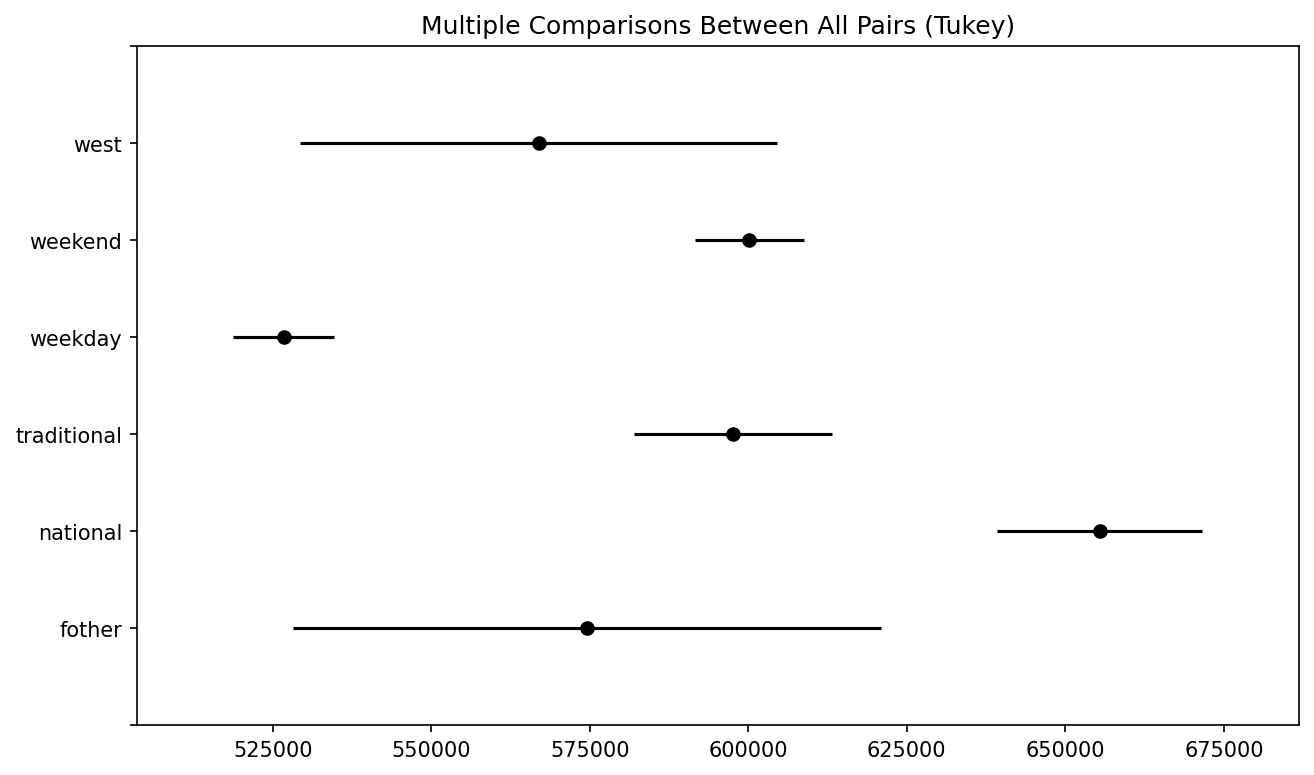

In [25]:
_ = mc.tukeyhsd().plot_simultaneous()

### Required Condition

#### Check normality assumption - Shapiro Wilk Test

$$H_0: \text{residual of all datapoints are normally distributed}$$  
$$H_1: \text{residual of all datapoints are not normally distributed}$$  

In [26]:
stat, p = stats.shapiro(results.resid)
print('Statistics=%.4f, p=%.4f' % (stat, p))

Statistics=0.9760, p=0.0000


D:\New folder\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


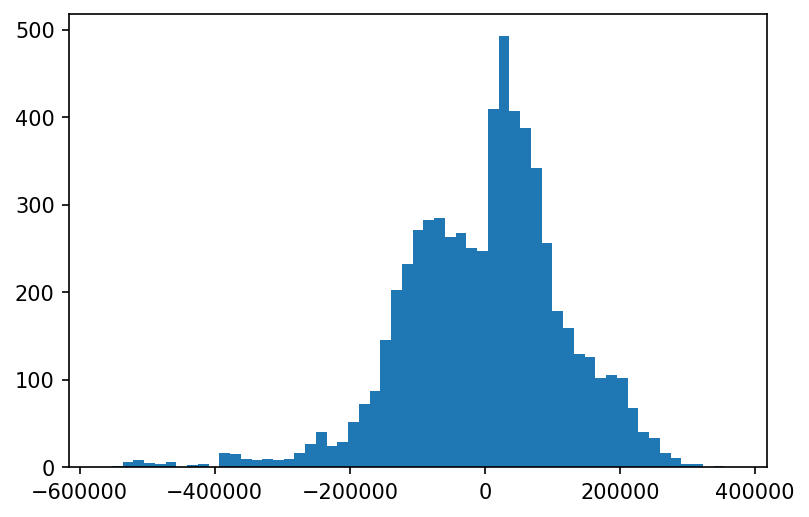

In [27]:
_ = plt.hist(results.resid, bins = "auto")

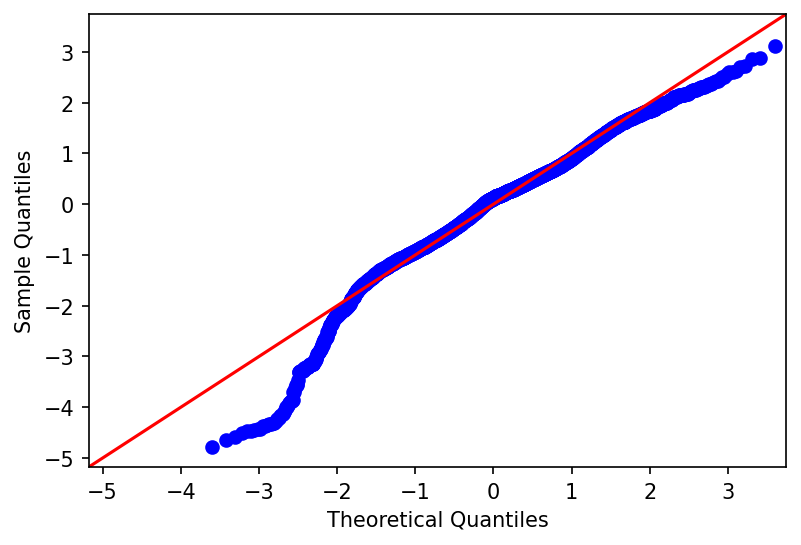

In [28]:
fig = sm.qqplot(results.resid, stats.norm, fit=True, line='45')
plt.show()

#### Check equal variance assumption - Bartlett's Test

$$H_0: \text{Variance of different treatment groups are equal}$$  
$$H_1: \text{At least two treatment groups have different variance}$$

In [29]:
df2['resid'] = results.resid
stats.bartlett(df2['resid'][df2['Holiday_Type'] == 'weekday'], 
               df2['resid'][df2['Holiday_Type'] == 'weekend'], 
               df2['resid'][df2['Holiday_Type'] == 'traditional'],
                df2['resid'][df2['Holiday_Type'] == 'national'],
                df2['resid'][df2['Holiday_Type'] == 'west'],
              df2['resid'][df2['Holiday_Type'] == 'fother'])

BartlettResult(statistic=90.2096874737218, pvalue=6.071205944563251e-18)

### Nonparametric - Kruskal

In [30]:
alldata = np.array([])
for day in days:
    alldata = np.concatenate([alldata, day])
alldata.sort()
tmpdf = pd.DataFrame(({'value': alldata}))
tmpdf['rank'] = tmpdf.index + 1
value2rank = tmpdf.groupby('value').mean().reset_index()
value2rank

,value,rank
0,6067.0,1.0
1,11739.0,2.0
2,36768.0,3.0
3,48663.0,4.0
4,53005.0,5.0
...,...,...
6246,897224.0,6295.0
6247,901803.0,6296.0
6248,902334.0,6297.0
6249,910724.0,6298.0


In [31]:
T = []
for i, day in enumerate(days):
    samp = pd.DataFrame({'value': day})
    samp = pd.merge(samp, value2rank)
    T.append(samp['rank'].sum())
    print(f"T%s = {T[i]}"%(i))

T0 = 11698897.5
T1 = 6005491.0
T2 = 872796.0
T3 = 973853.5
T4 = 162747.0
T5 = 128065.0


In [32]:
n = []
columns = ['Weekday', 'Weekend', 'Traditional', 'National', 'Western', 'Fother']
for column in columns:
    n.append(df1[column].dropna().shape[0])
    
T = np.array(T)
n = np.array(n)
x = T ** 2 / n
k = 6
n = n.sum()
H = 12 / (n * (n + 1)) * (x.sum()) - 3 * (n + 1)
pvalue = 1 - stats.chi2.cdf(H, k - 1)

print(f"H = {H}")
print(f"p-value = {pvalue}")

H = 601.2293556897421
p-value = 0.0


## 假期長度

### Parametric - One Way Anova

In [33]:
days_len = [[], [], [], [], [], []]

In [34]:
year = np.arange(2005, 2023, 1)
month = np.arange(1, 13, 1)
for y in year:
    if(y == 2022):
        month = np.arange(1, 4, 1)
    for m in month:
        for d in np.arange(1, calendar.monthrange(y,m)[1] + 1, 1):
            today = datetime(y,m,d)
            length = getHolidayLength(today)
            if(length > 4):
                days_len[5].append(transportCnt[today])
            else:
                days_len[length].append(transportCnt[today])

In [35]:
df1 = pd.DataFrame(days_len).T
df1.columns = ['Normal', 'One', 'Two', 'Three', 'Four', 'FourPlus']
df1

,Normal,One,Two,Three,Four,FourPlus
0,298141.0,489161.0,382902.0,478008.0,504462.0,274651.0
1,252051.0,525979.0,412908.0,489242.0,527932.0,477359.0
2,263399.0,429652.0,408412.0,518795.0,462249.0,521655.0
3,280465.0,591644.0,452831.0,568488.0,546841.0,593039.0
4,403391.0,494849.0,304253.0,451271.0,505465.0,582214.0
...,...,...,...,...,...,...
4278,654697.0,NaN,NaN,NaN,NaN,NaN
4279,487321.0,NaN,NaN,NaN,NaN,NaN
4280,480399.0,NaN,NaN,NaN,NaN,NaN
4281,488678.0,NaN,NaN,NaN,NaN,NaN


In [36]:
# wide_to_long假設同樣資料在不同因素下的名稱有相同的字頭，因此我們要改欄位名稱。
df1b = df1.rename(columns={'Normal': 'TPcnt_normal', "One": "TPcnt_one", 
                          "Two": "TPcnt_two", "Three": "TPcnt_three"
                         , "Four": "TPcnt_four", "FourPlus": "TPcnt_fourplus"})
# 需要一個ID欄位
df1b["id"] = df1b.index
# 呼叫wide_to_long(); 文件請見: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.wide_to_long.html
df2 = pd.wide_to_long(df1b, ["TPcnt"], sep="_", suffix='\w+', i="id", j="Holiday_Type").reset_index()
df2 = df2.dropna()
print("Head of dataset:")
display(df2.head())
print("Tail of dataset:")
display(df2.tail())

Head of dataset:


,id,Holiday_Type,TPcnt
0,0,normal,298141.0
1,1,normal,252051.0
2,2,normal,263399.0
3,3,normal,280465.0
4,4,normal,403391.0


Tail of dataset:


,id,Holiday_Type,TPcnt
21549,134,fourplus,436579.0
21550,135,fourplus,417748.0
21551,136,fourplus,442142.0
21552,137,fourplus,436386.0
21553,138,fourplus,436223.0


In [37]:
results = smf.ols('TPcnt ~ C(Holiday_Type)', data=df2).fit()
# results.summary()
aov_table = sms.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Holiday_Type),9.118283e+12,5.0,129.095461,1.401010e-130
Residual,8.889755e+13,6293.0,NaN,NaN


In [38]:
mc = smm.MultiComparison(df2['TPcnt'], df2['Holiday_Type'])
print(mc.tukeyhsd().summary())

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
 group1   group2    meandiff   p-adj     lower        upper     reject
----------------------------------------------------------------------
    four fourplus  -66775.1867  0.001 -110463.7216  -23086.6519   True
    four   normal -144670.3074  0.001 -177982.2985 -111358.3163   True
    four      one -104495.5811  0.001 -177531.3787  -31459.7834   True
    four    three  -37827.4729 0.1372  -81723.9904    6069.0446  False
    four      two   -72240.133  0.001  -106214.723  -38265.5429   True
fourplus   normal  -77895.1207  0.001 -107094.4384  -48695.8031   True
fourplus      one  -37720.3944 0.6374 -108974.4408   33533.6521  False
fourplus    three   28947.7138 0.3312  -11915.6641   69811.0916  False
fourplus      two   -5464.9462    0.9   -35417.979   24488.0865  False
  normal      one   40174.7264 0.4977  -25232.7641  105582.2169  False
  normal    three  106842.8345  0.001   77333.2374  136352.4316   True
  norm

D:\New folder\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


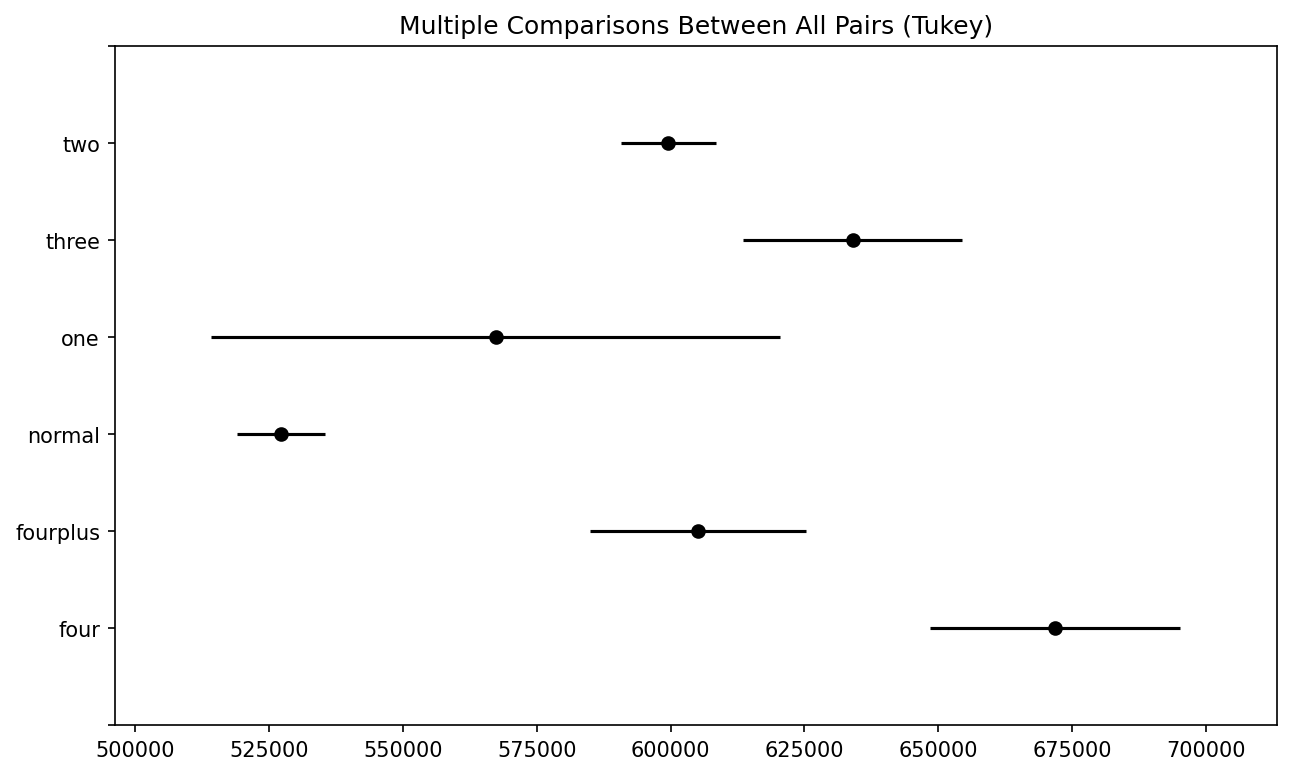

In [39]:
_ = mc.tukeyhsd().plot_simultaneous()

### Required Condition

#### Check normality assumption - Shapiro Wilk Test

$$H_0: \text{residual of all datapoints are normally distributed}$$  
$$H_1: \text{residual of all datapoints are not normally distributed}$$  

In [40]:
stat, p = stats.shapiro(results.resid)
print('Statistics=%.4f, p=%.4f' % (stat, p))

Statistics=0.9752, p=0.0000


D:\New folder\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


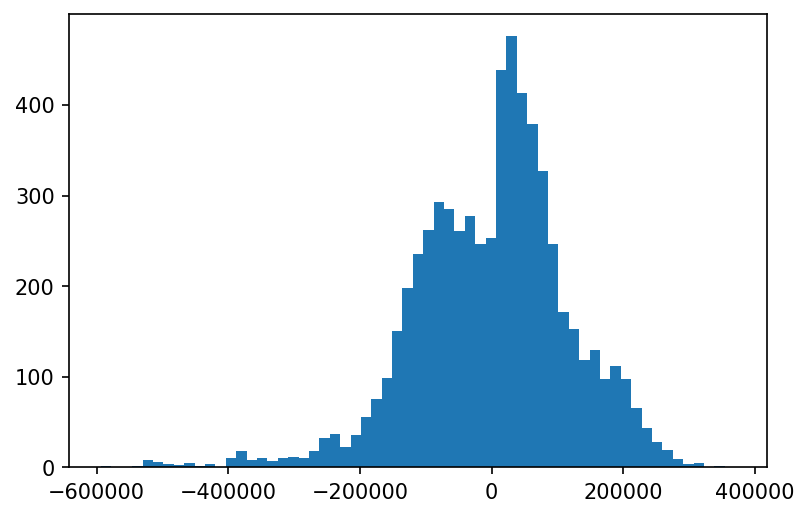

In [41]:
_ = plt.hist(results.resid, bins = "auto")

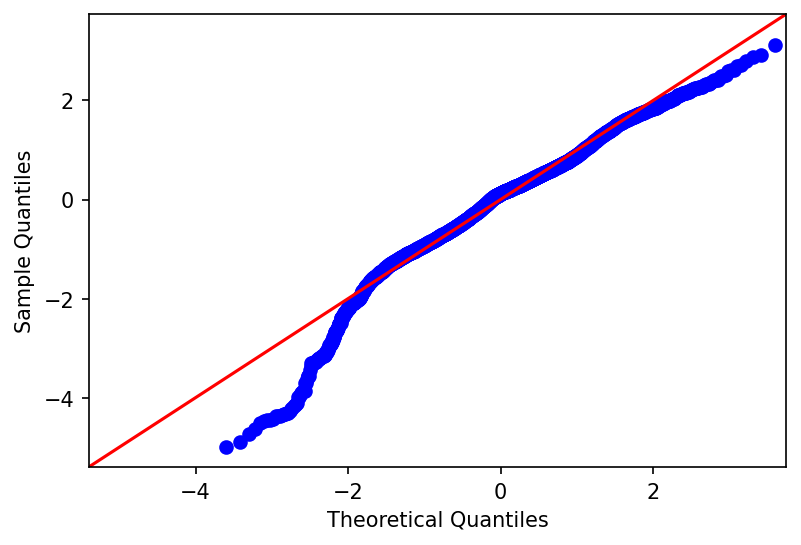

In [42]:
fig = sm.qqplot(results.resid, stats.norm, fit=True, line='45')
plt.show()

### Nonparametric - Kruskal

In [43]:
alldata = np.array([])
for day in days_len:
    alldata = np.concatenate([alldata, day])
alldata.sort()
tmpdf = pd.DataFrame(({'value': alldata}))
tmpdf['rank'] = tmpdf.index + 1
value2rank = tmpdf.groupby('value').mean().reset_index()
value2rank

,value,rank
0,6067.0,1.0
1,11739.0,2.0
2,36768.0,3.0
3,48663.0,4.0
4,53005.0,5.0
...,...,...
6246,897224.0,6295.0
6247,901803.0,6296.0
6248,902334.0,6297.0
6249,910724.0,6298.0


In [44]:
T = []
for i, day in enumerate(days_len):
    samp = pd.DataFrame({'value': day})
    samp = pd.merge(samp, value2rank)
    T.append(samp['rank'].sum())
    print(f"T%s = {T[i]}"%(i))

T0 = 11873941.0
T1 = 88790.0
T2 = 6263799.0
T3 = 593204.5
T4 = 498025.5
T5 = 524090.0


In [45]:
n = []
columns = ['Normal', 'One', 'Two', 'Three', 'Four', 'FourPlus']
for column in columns:
    n.append(df1[column].dropna().shape[0])
# print(n)
T = np.array(T)
n = np.array(n)
x = T ** 2 / n
k = 6
n = n.sum()
H = 12 / (n * (n + 1)) * (x.sum()) - 3 * (n + 1)
pvalue = 1 - stats.chi2.cdf(H, k - 1)

print(f"H = {H}")
print(f"p-value = {pvalue}")

H = 608.458137427675
p-value = 0.0


## 情人節

In [46]:
valentines = [[] for i in range(12)]

In [47]:
year = np.arange(2005, 2023, 1)
month = np.arange(1, 13, 1)
for y in year:
    if(y == 2022):
        month = np.arange(1, 4, 1)
    for m in month:
        valentines[m - 1].append(transportCnt[datetime(y, m, 14)])

In [48]:
df1 = pd.DataFrame(valentines).T
month = np.arange(1, 13, 1)
month = ["TPcnt_" + str(m) for m in month]
df1.columns = month
df1.index = year
df1

,TPcnt_1,TPcnt_2,TPcnt_3,TPcnt_4,TPcnt_5,TPcnt_6,TPcnt_7,TPcnt_8,TPcnt_9,TPcnt_10,TPcnt_11,TPcnt_12
2005,318290.0,450405.0,318814.0,284349.0,409884.0,324829.0,395254.0,531341.0,358410.0,515262.0,398514.0,245290.0
2006,449150.0,452942.0,400824.0,515705.0,588807.0,399951.0,352437.0,469339.0,407397.0,458128.0,375854.0,389563.0
2007,461995.0,474573.0,400144.0,479489.0,459170.0,395200.0,468255.0,404362.0,533525.0,577699.0,400046.0,486394.0
2008,425209.0,440739.0,559180.0,441385.0,429831.0,447319.0,513484.0,494439.0,315094.0,442171.0,602224.0,560965.0
2009,407928.0,587094.0,514156.0,418894.0,434937.0,487682.0,463845.0,566959.0,454860.0,446615.0,531077.0,486911.0
2010,438368.0,525868.0,621736.0,439190.0,594804.0,481583.0,502899.0,589628.0,467603.0,471497.0,640914.0,442155.0
2011,580913.0,512991.0,527480.0,479468.0,535165.0,476302.0,522079.0,598311.0,499761.0,652130.0,547550.0,485504.0
2012,656178.0,556255.0,500013.0,647461.0,602657.0,493279.0,678877.0,611067.0,675156.0,749914.0,532916.0,741383.0
2013,561754.0,840697.0,553870.0,664208.0,545777.0,693058.0,627192.0,583750.0,630801.0,597594.0,564056.0,711487.0
2014,519949.0,707415.0,758990.0,595793.0,562522.0,654366.0,643682.0,608560.0,753128.0,555984.0,744383.0,822566.0


In [49]:
# 需要一個ID欄位
df1["id"] = df1.index
# 呼叫wide_to_long(); 文件請見: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.wide_to_long.html
df2 = pd.wide_to_long(df1, ["TPcnt"], sep="_", suffix='\w+', i="id", j="Month").reset_index()
df2 = df2.dropna()
print("Head of dataset:")
display(df2.head())
print("Tail of dataset:")
display(df2.tail())

Head of dataset:


,id,Month,TPcnt
0,2005,1,318290.0
1,2006,1,449150.0
2,2007,1,461995.0
3,2008,1,425209.0
4,2009,1,407928.0


Tail of dataset:


,id,Month,TPcnt
210,2017,12,587006.0
211,2018,12,769429.0
212,2019,12,841575.0
213,2020,12,592265.0
214,2021,12,493577.0


In [50]:
results = smf.ols('TPcnt ~ C(Month)', data=df2).fit()
# results.summary()
aov_table = sms.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Month),1.095866e+11,11.0,0.626393,0.805017
Residual,3.101364e+12,195.0,NaN,NaN


In [51]:
mc = smm.MultiComparison(df2['TPcnt'], df2['Month'])
# print(mc.tukeyhsd().summary())

### Required Condition

#### Check normality assumption - Shapiro Wilk Test

$$H_0: \text{residual of all datapoints are normally distributed}$$  
$$H_1: \text{residual of all datapoints are not normally distributed}$$  

In [52]:
stat, p = stats.shapiro(results.resid)
print('Statistics=%.4f, p=%.4f' % (stat, p))

Statistics=0.9887, p=0.1022


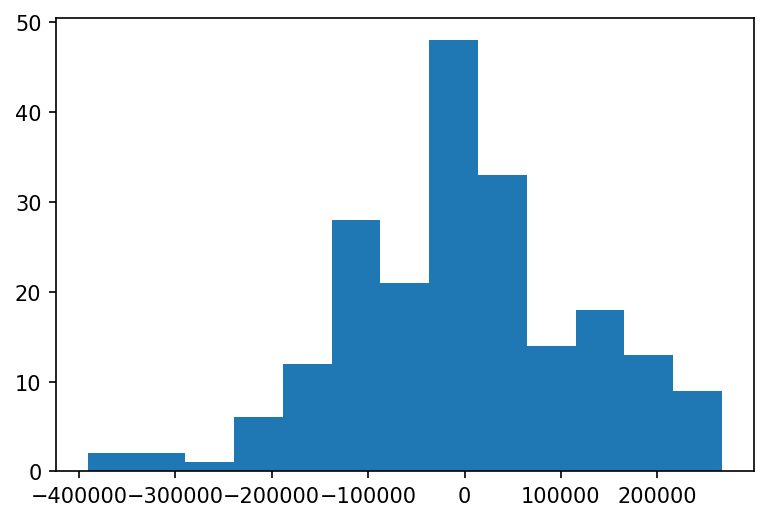

In [53]:
_ = plt.hist(results.resid, bins = "auto")

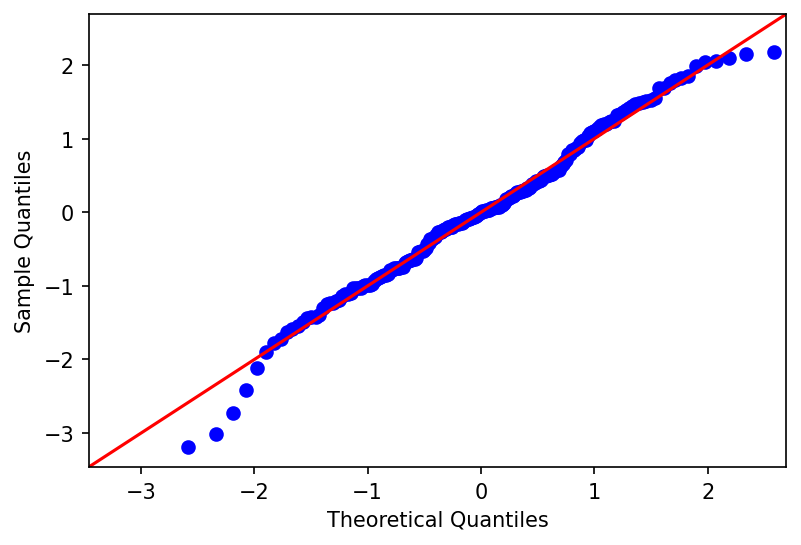

In [54]:
fig = sm.qqplot(results.resid, stats.norm, fit=True, line='45')
plt.show()

#### Check equal variance assumption - Bartlett's Test

$$H_0: \text{Variance of different treatment groups are equal}$$  
$$H_1: \text{At least two treatment groups have different variance}$$

In [55]:
df2['resid'] = results.resid
stats.bartlett(df2['resid'][df2['Month'] == 1],
              df2['resid'][df2['Month'] == 2],
              df2['resid'][df2['Month'] == 3],
                df2['resid'][df2['Month'] == 4],
              df2['resid'][df2['Month'] == 5],
              df2['resid'][df2['Month'] == 6],
              df2['resid'][df2['Month'] == 7],
              df2['resid'][df2['Month'] == 8],
              df2['resid'][df2['Month'] == 9],
              df2['resid'][df2['Month'] == 10],
              df2['resid'][df2['Month'] == 11],
              df2['resid'][df2['Month'] == 12],
)

BartlettResult(statistic=10.02642844719274, pvalue=0.5280114689759352)

## 日子 - Try

### Parametric - One Way Anova

$$H_0: \mu_{平日} = \mu_{一般假日} = \mu_{傳統} = \mu_{國定} = \mu_{西洋} = \mu_{X親}$$  
$$H_1: \text{one of the equality in } H_0 \text{ is not satisfied}$$

In [56]:
traditional = ['春節', '端午', '中秋']
national = ['雙十', '二二八', '元旦', '清明', '勞動']

In [57]:
days = [[]for i in range(2)]

In [58]:
year = np.arange(2005, 2023, 1)
month = np.arange(1, 13, 1)
for y in year:
    if(y == 2022):
        month = np.arange(1, 4, 1)
    for m in month:
        for d in np.arange(1, calendar.monthrange(y,m)[1] + 1, 1):
            today = datetime(y,m,d)
            if(isHoliday(year, traditional, today)[0]):
                days[0].append(transportCnt[today])
            elif(isHoliday(year, national, today)[0]):
                days[1].append(transportCnt[today])
#             elif((m == 12 and d == 25) or (m == 2 and d == 14) or (m == 10 and d == 31)):
#                 days[4].append(transportCnt[today])
#             elif((m == 8 and d == 8) or (m == 5 and d <= 14 and d >= 8 and today.isoweekday() == 7)):
#                 days[5].append(transportCnt[today])
#             elif(today.isoweekday() == 6 or today.isoweekday() == 7):
#                 days[1].append(transportCnt[today])
#             else:
#                 days[0].append(transportCnt[today])

In [59]:
df1 = pd.DataFrame(days).T
columns = ['Traditional', 'National']
df1.columns = columns
df1

,Traditional,National
0,274651.0,478008.0
1,477359.0,489242.0
2,521655.0,518795.0
3,593039.0,504462.0
4,582214.0,527932.0
...,...,...
226,436579.0,NaN
227,417748.0,NaN
228,442142.0,NaN
229,436386.0,NaN


In [60]:
print([df1[column].dropna().shape[0] for column in columns])

[231, 216]


In [61]:
# wide_to_long假設同樣資料在不同因素下的名稱有相同的字頭，因此我們要改欄位名稱。
df1b = df1.copy()
df1b.columns = ["TPcnt_" + str(column) for column in columns]
# 需要一個ID欄位
df1b["id"] = df1b.index
# 呼叫wide_to_long(); 文件請見: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.wide_to_long.html
df2 = pd.wide_to_long(df1b, ["TPcnt"], sep="_", suffix='\w+', i="id", j="Holiday_Type").reset_index()
df2 = df2.dropna().reset_index(drop = True)
print("Head of dataset:")
display(df2.head())
print("Tail of dataset:")
display(df2.tail())

Head of dataset:


,id,Holiday_Type,TPcnt
0,0,Traditional,274651.0
1,1,Traditional,477359.0
2,2,Traditional,521655.0
3,3,Traditional,593039.0
4,4,Traditional,582214.0


Tail of dataset:


,id,Holiday_Type,TPcnt
442,211,National,551304.0
443,212,National,540272.0
444,213,National,578117.0
445,214,National,576949.0
446,215,National,639789.0


In [62]:
import statsmodels.stats.outliers_influence as sso

results = smf.ols('TPcnt ~ C(Holiday_Type)', data=df2).fit()

st1, data1, ss3 = sso.summary_table(results, alpha=0.05)
SD = data1[:, 10]

# results.summary()
aov_table = sms.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Holiday_Type),3.741383e+11,1.0,19.758926,0.000011
Residual,8.426143e+12,445.0,NaN,NaN


In [63]:
df1_c = pd.DataFrame(SD,columns = ['SD'])
filter = (df1_c['SD'] < -2) | (df1_c['SD'] > 2)
print("Outliers by SD = \n")
print(df1_c['SD'].loc[filter])

Outliers by SD = 

0     -2.351677
47    -3.330222
48    -2.057133
50    -2.105535
117    2.068662
129    2.004907
169    2.215843
183    2.467542
215   -3.834873
216   -3.965915
217   -3.507621
224   -2.094509
419   -2.018098
420   -2.396301
Name: SD, dtype: float64


In [64]:
a = df1_c['SD'].loc[filter].reset_index()
outliers = [a['index'][i] for i in range(len(a))]
print(outliers)

[0, 47, 48, 50, 117, 129, 169, 183, 215, 216, 217, 224, 419, 420]


In [65]:
df2 = df2.drop(outliers)

In [66]:
import statsmodels.stats.outliers_influence as sso

results = smf.ols('TPcnt ~ C(Holiday_Type)', data=df2).fit()

st1, data1, ss3 = sso.summary_table(results, alpha=0.05)
SD = data1[:, 10]

# results.summary()
aov_table = sms.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Holiday_Type),2.886445e+11,1.0,19.161867,0.000015
Residual,6.492363e+12,431.0,NaN,NaN


### Required Condition

#### Check normality assumption - Shapiro Wilk Test

$$H_0: \text{residual of all datapoints are normally distributed}$$  
$$H_1: \text{residual of all datapoints are not normally distributed}$$  

In [67]:
stat, p = stats.shapiro(results.resid)
print('Statistics=%.4f, p=%.4f' % (stat, p))

Statistics=0.9803, p=0.0000


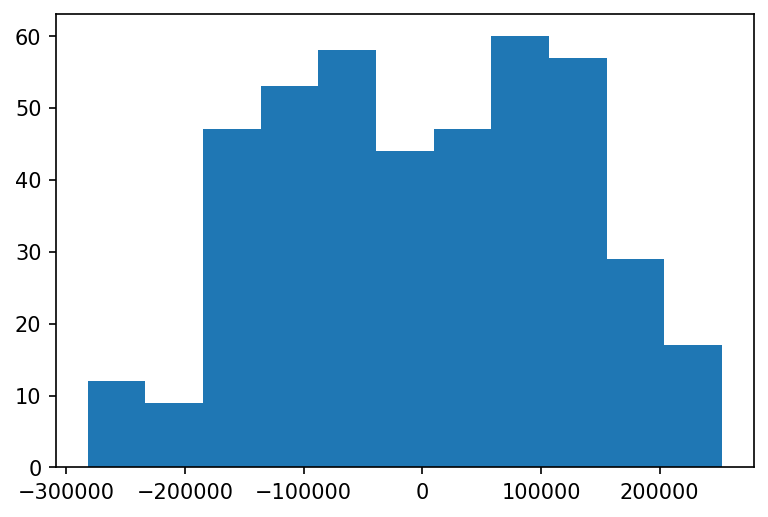

In [68]:
_ = plt.hist(results.resid, bins = "auto")

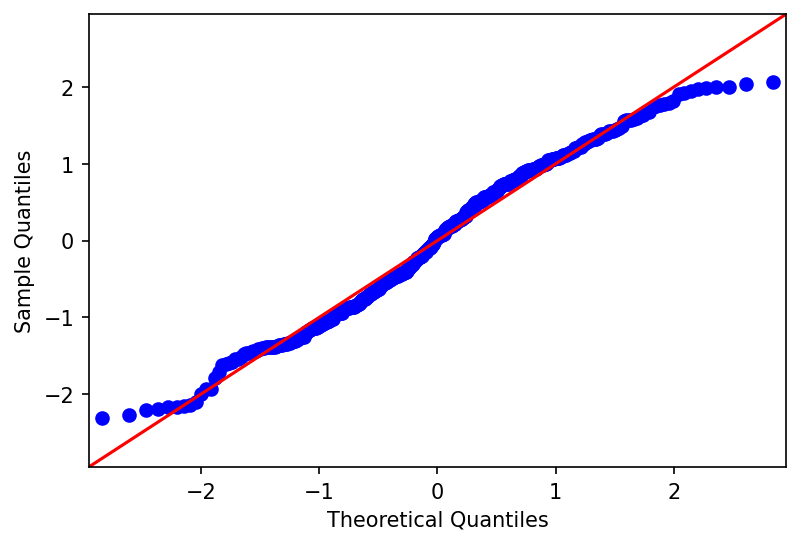

In [69]:
fig = sm.qqplot(results.resid, stats.norm, fit=True, line='45')
plt.show()